In [737]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import confusion_matrix,plot_confusion_matrix
from sklearn.metrics import classification_report


In [738]:
data=pd.read_csv('water_potability.csv')
data.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


In [739]:
#checking if there's data missing
data.isnull().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

In [740]:
#filling the missing data
data['ph'].fillna(value=data['ph'].median(),inplace=True)
data['Sulfate'].fillna(value=data['Sulfate'].median(),inplace=True)
data['Trihalomethanes'].fillna(value=data['Trihalomethanes'].median(),inplace=True)
data

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,7.036752,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,333.073546,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,333.073546,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0
...,...,...,...,...,...,...,...,...,...,...
3271,4.668102,193.681735,47580.991603,7.166639,359.948574,526.424171,13.894419,66.687695,4.435821,1
3272,7.808856,193.553212,17329.802160,8.061362,333.073546,392.449580,19.903225,66.622485,2.798243,1
3273,9.419510,175.762646,33155.578218,7.350233,333.073546,432.044783,11.039070,69.845400,3.298875,1
3274,5.126763,230.603758,11983.869376,6.303357,333.073546,402.883113,11.168946,77.488213,4.708658,1


In [741]:
#standardizing and spliting the data
X=data.drop('Potability',axis=1).values
y=data['Potability'].values
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.4,random_state=0)


In [742]:
#scaling
scaler=StandardScaler()
scaler.fit(X_train)
X_train=scaler.transform(X_train)
X_test=scaler.transform(X_test)

In [743]:
#modeling
model=LogisticRegression(class_weight='balanced')
model.fit(X_train, y_train)
model_pred=model.predict(X_test)
acc=accuracy_score(y_test,model_pred)
acc

0.5080091533180778

[[432 396]
 [249 234]]


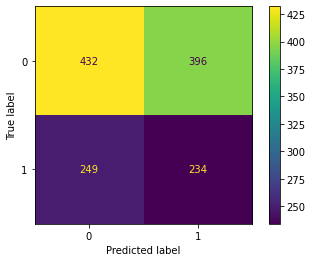

In [744]:
plot_confusion_matrix(model,X_test,y_test)
c=confusion_matrix(y_test,model_pred)
print(c)

In [745]:
print(classification_report(y_test,model_pred))

              precision    recall  f1-score   support

           0       0.63      0.52      0.57       828
           1       0.37      0.48      0.42       483

    accuracy                           0.51      1311
   macro avg       0.50      0.50      0.50      1311
weighted avg       0.54      0.51      0.52      1311



auc score: 0.5031055900621118


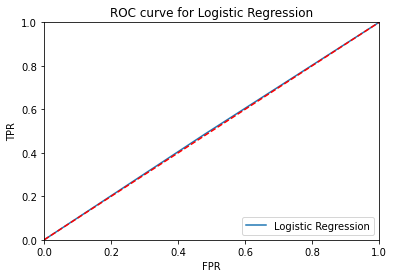

In [746]:
model_auc=roc_auc_score(y_test,model_pred)
fpr, tpr, threshold = roc_curve(y_test, model_pred)
print('auc score:', model_auc)
plt.figure()
plt.plot(fpr,tpr,label='Logistic Regression'%model_auc)
plt.plot([0,1],[0,1],'r--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC curve for Logistic Regression')
plt.legend(loc="lower right")
plt.show()
